### **Задание 1**
1. Импортируйте библиотеки pandas и numpy.
2. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn..
3. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью
    функции train_test_split так, чтобы размер тестовой выборки
    составлял 30% от всех данных, при этом аргумент random state должен быть равен 42.
4. Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля
    sklearn.linear_model.
5. Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на
    тестовых.


In [92]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [99]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [100]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [101]:
data = boston.data
data.shape

(506, 13)

In [102]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [103]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Признаки в наборе данных "Boston House Prices" представляют собой различные характеристики, которые могут влиять на стоимость домов. Описание каждого из признаков:

1. CRIM - уровень преступности на душу населения по городам.
2. ZN - доля земель под жилую застройку, зонированную под участки площадью более 25 000 кв. футов.
3. INDUS - доля акров, не относящихся к розничной торговле и занятых в городах.
4. CHAS - фиктивная переменная, указывающая на ограниченность реки Чарльз (1, если граничит; 0 в противном случае).
5. NOX - концентрация оксидов азота (частей на 10 миллионов).
6. RM - среднее количество комнат на одно жилое помещение.
7. AGE - доля жилых единиц, построенных до 1940 года.
8. DIS - взвешенные расстояния до пяти бостонских центров занятости.
9. RAD - индекс доступности к радиальным автомобильным дорогам.
10. TAX - полная налоговая ставка на имущество на $10 000.
11. PTRATIO - отношение учеников к учителям по городам.
12. B - 1000(Bk - 0.63)^2, где Bk - доля чернокожих по городам.
13. LSTAT - процент населения с низким социальным статусом.

Целевой переменной (то, что мы пытаемся предсказать) является средняя стоимость домов, выраженная в тысячах долларов.

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [17]:
print(y.head(10).sort_values())

8    16.5
9    18.9
1    21.6
6    22.9
0    24.0
7    27.1
5    28.7
3    33.4
2    34.7
4    36.2
dtype: float64


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
lr = LinearRegression()

In [5]:
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = lr.predict(X_test)

In [20]:
print(np.sort(y_pred[:10]))

[14.07859899 15.4111932  17.3921241  18.85527988 20.59943345 23.03692679
 23.14668944 25.40321303 28.64896005 36.49501384]


## **Задание 2**
1. Создайте модель под названием model с помощью класса RandomForestRegressor из модуля
    sklearn.ensemble.
2. Сделайте агрумент n_estimators равным 1000,
    max_depth должен быть равен 12 и random_state сделайте равным 42.
3. Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
    но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
    чтобы получить из датафрейма одномерный массив Numpy,
4. так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно
    применение массивов вместо датафрейма.
5. Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из
    предыдущего задания.
6. Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [22]:
y_pred_lr = lr.predict(X_test)

In [23]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [24]:
model.fit(X_train, y_train.values)

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [25]:
y_pred_rf = model.predict(X_test)

In [26]:
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)

In [27]:
print(f"R^2 модели линейной регрессии: {r2_lr:.4f}")
print(f"R^2 модели случайного леса: {r2_rf:.4f}")

R^2 модели линейной регрессии: 0.7112
R^2 модели случайного леса: 0.8747


In [28]:
if r2_rf > r2_lr:
    print("Модель случайного леса работает лучше.")
else:
    print("Модель линейной регрессии работает лучше.")

Модель случайного леса работает лучше.


## **Задание 3**
1. Вызовите документацию для класса RandomForestRegressor,
    найдите информацию об атрибуте feature_importances_.
2. С помощью этого атрибута найдите сумму всех показателей важности,
    установите, какие два признака показывают наибольшую важность.

In [29]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimato

In [60]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [61]:

model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)


model.fit(X_train, y_train.values)



RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [62]:
# Получение важности признаков
importances = model.feature_importances_

# Создание датафрейма для удобства
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Сортировка по важности признаков
feature_importances = feature_importances.sort_values(by='importance', ascending=False)



In [63]:
# Вывод суммы всех показателей важности
total_importance = feature_importances['importance'].sum()
print(f"Сумма всех показателей важности: {total_importance}")

# Вывод двух признаков с наибольшей важностью
top_two_features = feature_importances.head(2)
print("Два признака с наибольшей важностью:")
print(top_two_features)

Сумма всех показателей важности: 0.9999999999999998
Два признака с наибольшей важностью:
   feature  importance
12   LSTAT    0.415847
5       RM    0.402682


## **Задание 4**
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию
по библиотеке *Matplotlib*, это датасет *Credit Card Fraud Detection*.Для этого датасета мы будем решать
задачу классификации - будем определять,какие из транзакции по кредитной карте являются
мошенническими.

Данный датасет сильно несбалансирован (так как случаи мошенничества
относительно редки),так что применение метрики *accuracy* не принесет пользы и не поможет выбрать
лучшую модель.Мы будем вычислять *AUC*, то есть площадь под кривой *ROC*.

* Импортируйте из соответствующих модулей *RandomForestClassifier*, *GridSearchCV* и *train_test_split*.
* Загрузите датасет *creditcard.csv* и создайте датафрейм *df*.
* С помощью метода *value_counts* с аргументом *normalize=True* убедитесь в том, что выборка
    несбалансирована. 
* Используя метод *info*, проверьте, все ли столбцы содержат числовые данные и нет
    ли в них пропусков.
**Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:**
- pd.options.display.max_columns = 100.

* Просмотрите первые 10 строк датафрейма df.
* Создайте датафрейм X из датафрейма df, исключив столбец Class.
* Создайте объект Series под названием y из столбца Class.
* Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split,
    используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.

Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры:

parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

**Создайте модель GridSearchCV со следующими аргументами:**
- estimator=RandomForestClassifier(random_state=100),
- param_grid=parameters,
- scoring='roc_auc',
- cv=3.
* Обучите модель на тренировочном наборе данных (может занять несколько минут).
* Просмотрите параметры лучшей модели с помощью атрибута best_params_.
* Предскажите вероятности классов с помощью полученной модели и метода predict_proba.
* Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и
    запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
* Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных,
    используя в качестве аргументов массивы y_test и y_pred_proba.


1. Импорт необходимых библиотек и загрузка данных:

In [70]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [71]:
plt.style.use('fivethirtyeight')

In [72]:
df = pd.read_csv('./creditcard_data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


2. Проверка дисбаланса классов в датасете:

In [73]:
df['Class'].value_counts(normalize=True)


0    0.998273
1    0.001727
Name: Class, dtype: float64

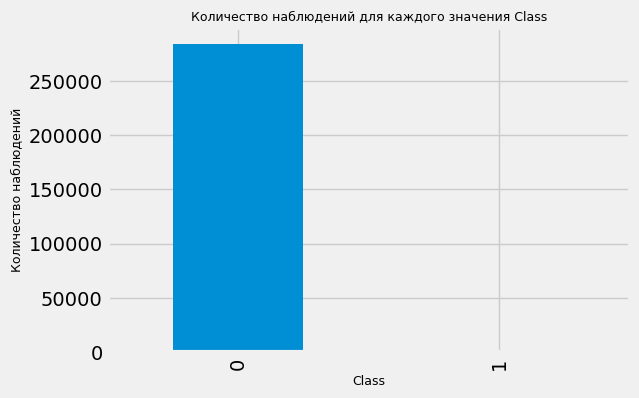

In [75]:
size = 9
class_counts = df['Class'].value_counts()

# Построим столбчатую диаграмму
class_counts.plot(kind='bar', figsize=(6, 4))
plt.title('Количество наблюдений для каждого значения Class', size=size)
plt.xlabel('Class', size=size)
plt.ylabel('Количество наблюдений', size=size)
plt.show()

3. Проверка типов данных и наличие пропусков:

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [78]:
# Устанавливаем опцию для вывода всех столбцов
pd.options.display.max_columns = 31

4. Подготовка данных для обучения модели:

In [79]:
X = df.drop(columns=['Class'])
y = df['Class']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [81]:
print(f"Форма X_train: {X_train.shape}, форма y_train: {y_train.shape}")
print(f"Форма X_test: {X_test.shape}, форма y_test: {y_test.shape}")

Форма X_train: (199364, 30), форма y_train: (199364,)
Форма X_test: (85443, 30), форма y_test: (85443,)


5. Настройка GridSearchCV для подбора параметров:

In [82]:
# Определяем сетку параметров для RandomForestClassifier
parameters = {
    'n_estimators': [10, 15],
    'max_features': [3, 4],
    'max_depth': [4, 5, 6]
}

In [83]:
# Создаем модель RandomForestClassifier
rfc = RandomForestClassifier(random_state=100)

In [84]:
# Настраиваем GridSearchCV с метрикой ROC AUC
grid_search = GridSearchCV(estimator=rfc, param_grid=parameters, scoring='roc_auc', cv=3)



In [85]:
# Обучаем модель на обучающем наборе данных
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [3, 4],
                         'n_estimators': [10, 15]},
             scoring='roc_auc')

In [104]:
# Выводим лучшие найденные параметры по GridSearchCV
print("Лучшие параметры, найденные GridSearchCV:")
print(grid_search.best_params_)

Лучшие параметры, найденные GridSearchCV:
{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}


6. Оценка модели на тестовых данных с использованием AUC-ROC:

In [105]:
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

In [106]:
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Значение AUC-ROC на тестовых данных: {auc_score:.4f}")

Значение AUC-ROC на тестовых данных: 0.9463


## **Дополнительные задания:**
1. Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в
    переменную data.
2. Полученный датасет не является датафреймом. Это структура данных, имеющая ключи
    аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys,
    содержащий ее ключи.
3. Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде
    привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими
    переносами и т.д.
    © geekbrains.ru 2
4. Сколько классов содержит целевая переменная датасета? Выведите названия классов.
5. На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков
    создайте датафрейм под названием X.
6. Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.
7. Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64.
    Название поля - 'target'.
8. Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название
    X_corr.
9. Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному
    значению превышает 0.5 (причем, само поле target не должно входить в этот список).
10. Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых
    содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X
    соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака.
    
Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с
признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с
помощью метода describe.


In [122]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
data = load_wine()

In [109]:
print(type(data))

<class 'sklearn.utils.Bunch'>


In [110]:
data_keys = data.keys()
print("Ключи датасета Wine:", data_keys)

Ключи датасета Wine: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [126]:
print(f"Описание датасета Wine: {data.DESCR}")

Описание датасета Wine: .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalin

In [112]:
target_names = data.target_names
num_classes = len(target_names)
print(f"\nКоличество классов целевой переменной: {num_classes}")
print("Названия классов:", target_names)


Количество классов целевой переменной: 3
Названия классов: ['class_0' 'class_1' 'class_2']


In [113]:
X = pd.DataFrame(data.data, columns=data.feature_names)

In [114]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [115]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [116]:
print(f"\nРазмер датафрейма X: {X.shape}")
print("Наличие пропущенных значений в X:", X.isnull().any().any())


Размер датафрейма X: (178, 13)
Наличие пропущенных значений в X: False


In [117]:
X['target'] = data.target.astype(np.int64)

In [118]:
X_corr = X.corr()

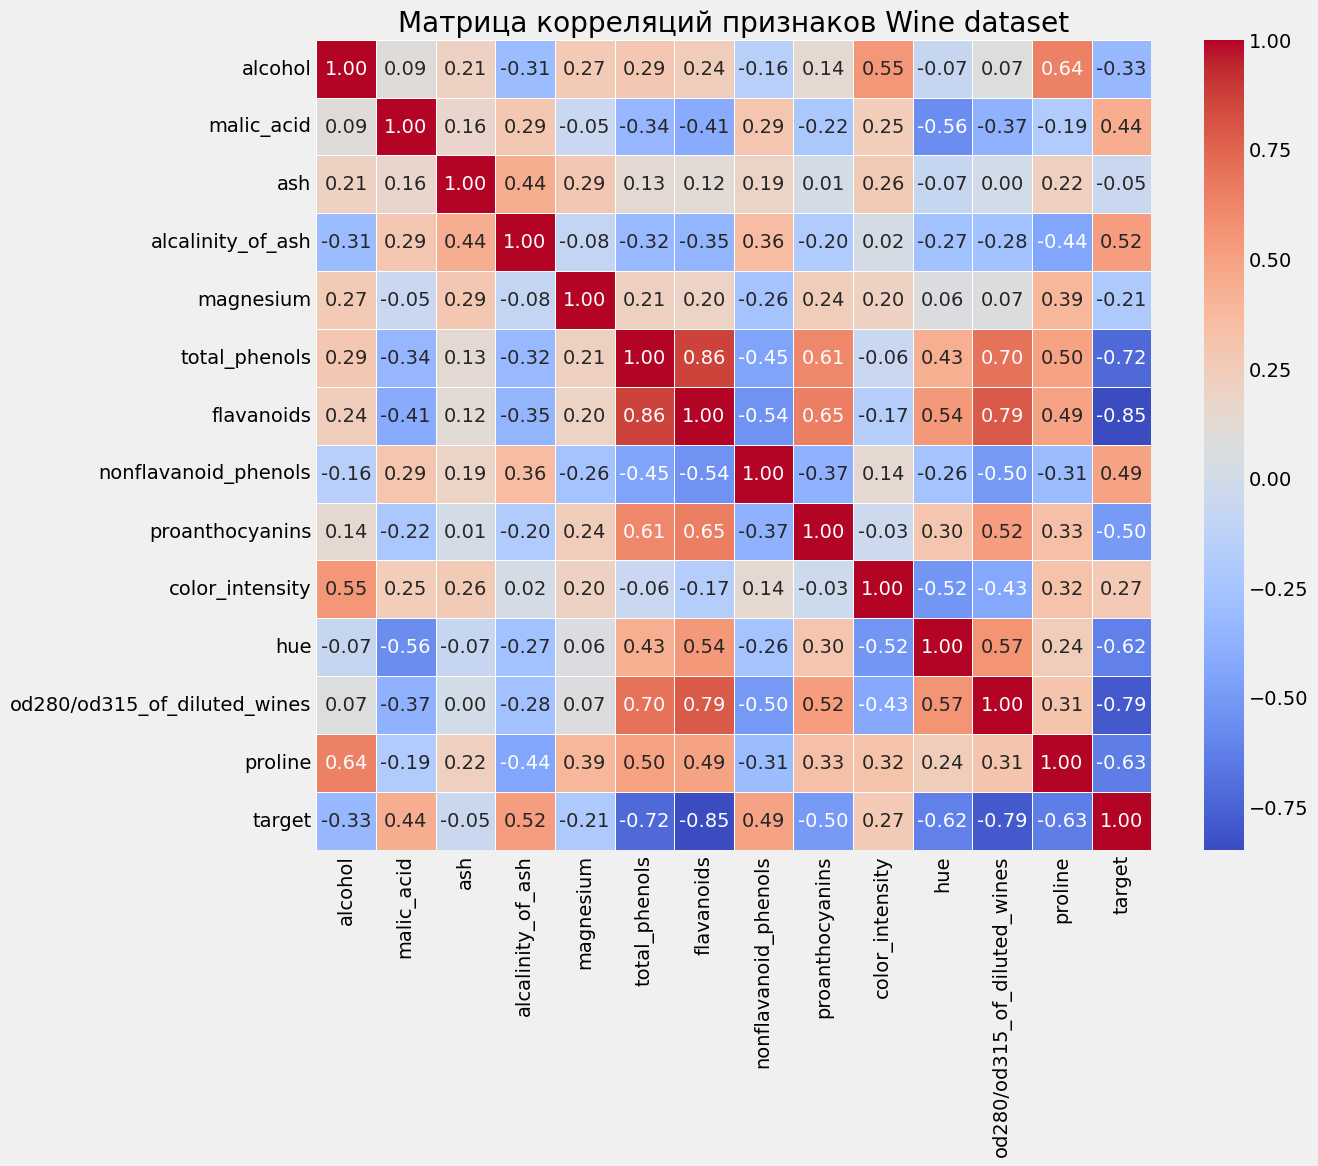

In [123]:
plt.figure(figsize=(12, 10))

# Построение тепловой карты (heatmap)
sns.heatmap(X_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций признаков Wine dataset')
plt.show()

In [119]:
high_corr = X_corr[np.abs(X_corr['target']) > 0.5].index.tolist()
high_corr.remove('target')  # Удаляем целевую переменную из списка high_corr

In [120]:
for feature in high_corr:
    X[f'{feature}_2'] = X[feature] ** 2

In [121]:
print("\nОписание полей датафрейма X:")
print(X.describe())


Описание полей датафрейма X:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453      